Loading data

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("DataScience_salaries_2024.csv")

# Yearly Inflation Rates
inflation = [1.022, 1.017, 1.036, 1.062, 1.048]

# Calculate the inflation adjusted salary for each year
data.loc[data['work_year'] == 2019, 'salary_in_usd'] *= np.prod(inflation[0:4])
data.loc[data['work_year'] == 2020, 'salary_in_usd'] *= np.prod(inflation[1:4])
data.loc[data['work_year'] == 2021, 'salary_in_usd'] *= np.prod(inflation[2:4])
data.loc[data['work_year'] == 2022, 'salary_in_usd'] *= np.prod(inflation[3:4])
data.loc[data['work_year'] == 2023, 'salary_in_usd'] *= inflation[4]

data['salary_in_usd'] = data['salary_in_usd'].apply(np.round)

data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,44051.0,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,39893.0,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,39985.0,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,85118.0,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,101300.0,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,70097.0,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,104153.0,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,18780.0,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,81040.0,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,44401.0,JP,50,JP,L


Basic information

In [195]:
print("Instances: " + str(data.shape[0]))
print("Attributes: " + str(data.shape[1]) +"\n")
data.info()
data.describe()

Instances: 14838
Attributes: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           14838 non-null  int64  
 1   experience_level    14838 non-null  object 
 2   employment_type     14838 non-null  object 
 3   job_title           14838 non-null  object 
 4   salary              14838 non-null  int64  
 5   salary_currency     14838 non-null  object 
 6   salary_in_usd       14838 non-null  float64
 7   employee_residence  14838 non-null  object 
 8   remote_ratio        14838 non-null  int64  
 9   company_location    14838 non-null  object 
 10  company_size        14838 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,155247.734398,32.760480
std,0.700799,3.562354e+05,71197.357472,46.488278
min,2020.000000,1.400000e+04,15930.000000,0.000000
25%,2023.000000,1.021000e+05,105700.000000,0.000000
50%,2023.000000,1.422000e+05,146720.000000,0.000000
75%,2024.000000,1.875000e+05,193880.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


There are 14838 instance and 11 attributes. There are 3 numerical attributes and 8 categorical attributes. There is no missing value.

In [196]:
# Defining new dataFrame with already numerical columns
encoded_data = data[['salary_in_usd','employee_residence','company_location','remote_ratio']].copy()

print(encoded_data)

       salary_in_usd employee_residence company_location  remote_ratio
0            44051.0                 CL               CL           100
1            39893.0                 HU               US            50
2            39985.0                 HU               HU            50
3            85118.0                 JP               JP            50
4           101300.0                 IN               IN            50
...              ...                ...              ...           ...
14833        15930.0                 GH               GH           100
14834        16784.0                 NG               CA             0
14835        16503.0                 TH               TH           100
14836        15930.0                 ID               ID             0
14837        17865.0                 DE               DE           100

[14838 rows x 4 columns]


<AxesSubplot:xlabel='job_title', ylabel='count'>

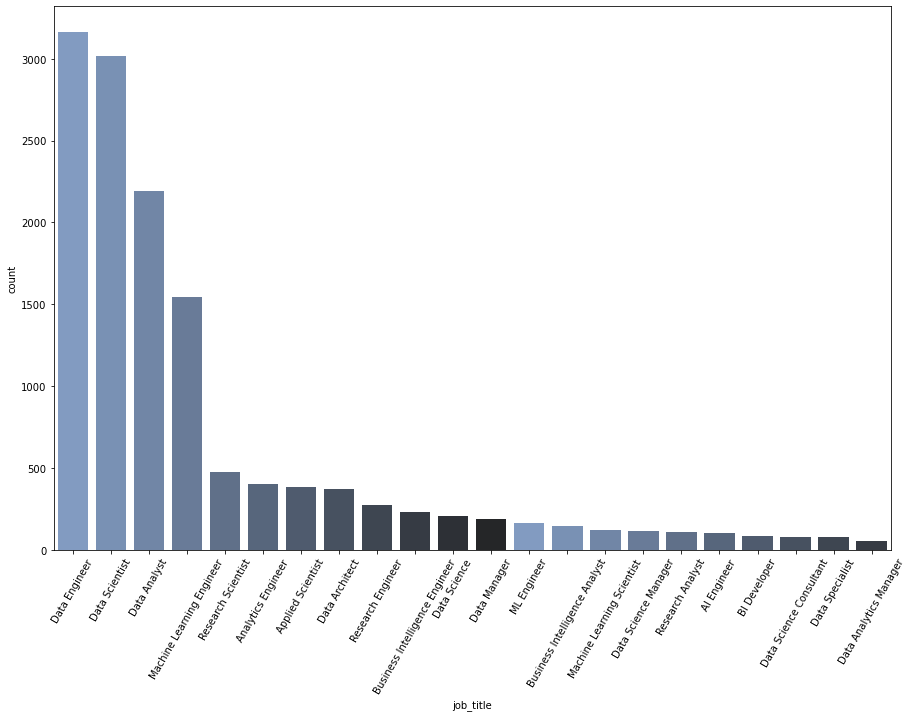

In [197]:
job_counts = data['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

filtered_jobs = data[data['job_title'].isin(job_counts[job_counts['count'] > 50]['job_title'])]


plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
color = sns.dark_palette("#79C", n_colors=12, reverse=True)
sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)

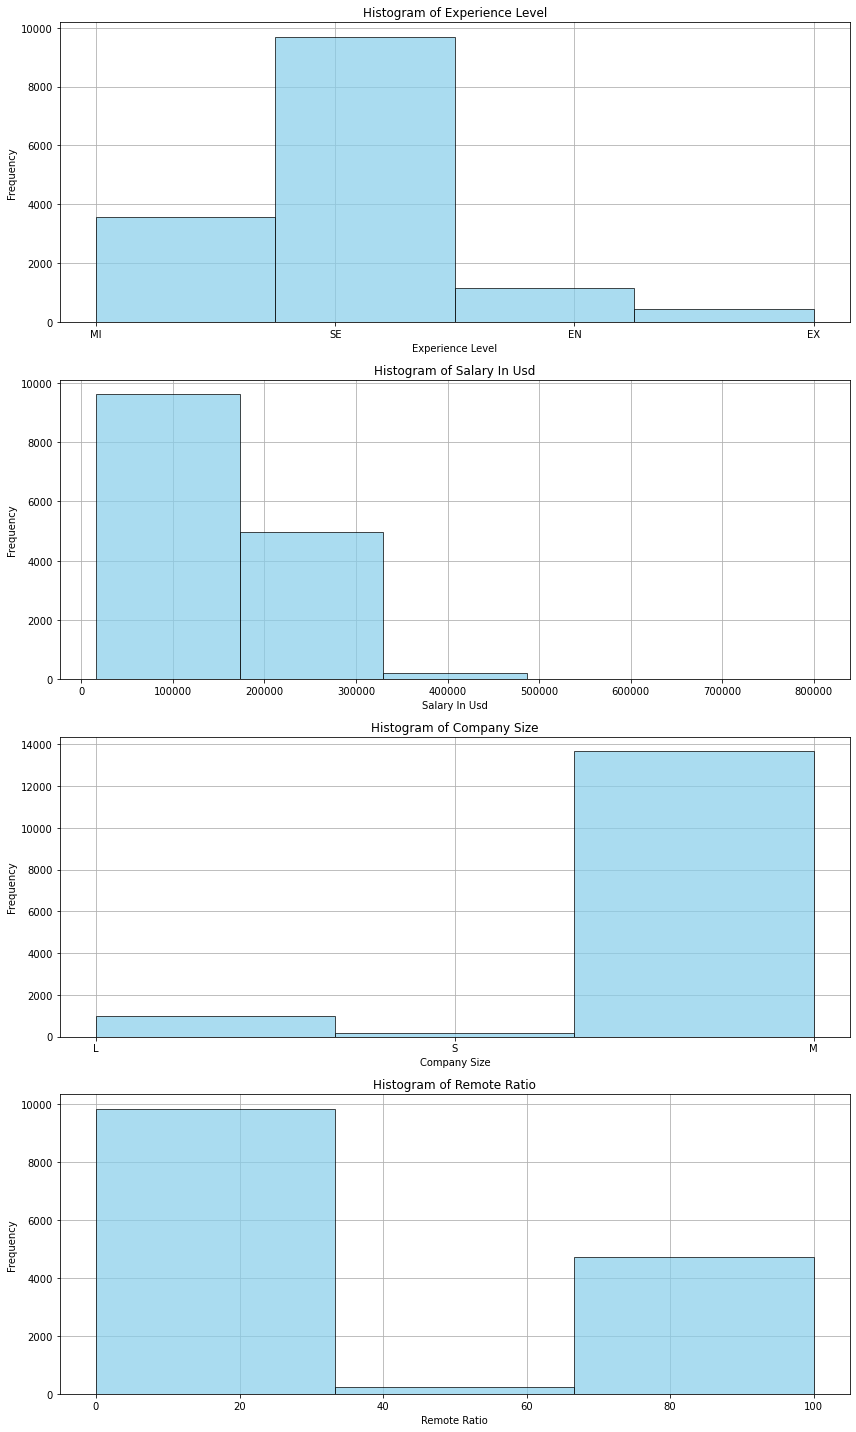

In [198]:
columns_to_plot = ['experience_level','salary_in_usd','company_size', 'remote_ratio']
bins = [4, 5, 3, 3]
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(12, num_plots * 5))

# Plot histograms using a for loop
for i, col in enumerate(columns_to_plot):
    axs[i].hist(data[col], bins=bins[i], color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_xlabel(col.replace('_', ' ').title())
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col.replace("_", " ").title()}')
    axs[i].grid(True)  # Add grid lines
    axs[i].set_axisbelow(True)  # Ensure grid lines are behind bars

plt.tight_layout()
plt.show()

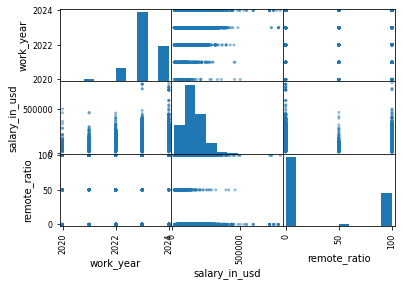

In [199]:
from pandas.plotting import scatter_matrix

attributes = ['work_year','salary_in_usd', 'remote_ratio']

scatter_matrix(data[attributes])
plt.show()

In [200]:
from sklearn.preprocessing import OrdinalEncoder

experience_level_cat = data[["experience_level"]]
categories = [['EN', 'MI', 'SE', 'EX']]
ordinal_encoder = OrdinalEncoder(categories=categories)

encoded_data.insert(1, "experience_level", ordinal_encoder.fit_transform(experience_level_cat), False)

print("Encoded categories:", encoded_data)
print("Mapped categories:", ordinal_encoder.categories_)

Encoded categories:        salary_in_usd  experience_level employee_residence company_location  \
0            44051.0               1.0                 CL               CL   
1            39893.0               1.0                 HU               US   
2            39985.0               1.0                 HU               HU   
3            85118.0               1.0                 JP               JP   
4           101300.0               2.0                 IN               IN   
...              ...               ...                ...              ...   
14833        15930.0               1.0                 GH               GH   
14834        16784.0               3.0                 NG               CA   
14835        16503.0               0.0                 TH               TH   
14836        15930.0               0.0                 ID               ID   
14837        17865.0               0.0                 DE               DE   

       remote_ratio  
0               100  

In [201]:
company_size_cat = data[["company_size"]]
categories = [['S', 'M', 'L']]
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_data.insert(2, "company_size", ordinal_encoder.fit_transform(company_size_cat), False)

print("Encoded categories:", encoded_data)
print("Mapped categories:", ordinal_encoder.categories_)

Encoded categories:        salary_in_usd  experience_level  company_size employee_residence  \
0            44051.0               1.0           2.0                 CL   
1            39893.0               1.0           2.0                 HU   
2            39985.0               1.0           2.0                 HU   
3            85118.0               1.0           0.0                 JP   
4           101300.0               2.0           2.0                 IN   
...              ...               ...           ...                ...   
14833        15930.0               1.0           1.0                 GH   
14834        16784.0               3.0           1.0                 NG   
14835        16503.0               0.0           2.0                 TH   
14836        15930.0               0.0           2.0                 ID   
14837        17865.0               0.0           0.0                 DE   

      company_location  remote_ratio  
0                   CL           100  
1

In [202]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_vars = ['employee_residence', 'company_location', 'remote_ratio']

non_categorical_vars = ['salary_in_usd', 'experience_level', 'company_size']

one_hot_encoder = OneHotEncoder(sparse=False, drop='first') 

col_transform = ColumnTransformer(
    [('onehot', one_hot_encoder, categorical_vars)], remainder='passthrough'
)
data_col_transformed = col_transform.fit_transform(encoded_data)

feature_names = col_transform.get_feature_names_out()

encoded_data_df = pd.DataFrame(data_col_transformed, columns=feature_names.tolist() + non_categorical_vars)

one_hot_vars = data[['employee_residence','company_location','remote_ratio']]


# proccessedData = one_hot_encoder.fit_transform(one_hot_vars)

# print(proccessedData.shape)
# print(encoded_data.shape)

# encoded_data = pd.concat([encoded_data, pd.DataFrame(proccessedData)], axis=1)

# df_newp = one_hot_encoder.fit_transform(employee_residence_cat)
# temp
# data['employee_residence']

print("New Shape", encoded_data.shape)
print("Mapped categories:", one_hot_encoder.categories_)

/home/ryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Shape of passed values is (14838, 168), indices imply (14838, 171)

In [ ]:

correlation_matrix = encoded_data_df.corr()

print(correlation_matrix)


                               onehot__employee_residence_AD  \
onehot__employee_residence_AD                       1.000000   
onehot__employee_residence_AE                      -0.000151   
onehot__employee_residence_AM                      -0.000095   
onehot__employee_residence_AR                      -0.000224   
onehot__employee_residence_AS                      -0.000067   
...                                                      ...   
onehot__remote_ratio_50                             0.062969   
onehot__remote_ratio_100                           -0.005622   
remainder__salary_in_usd                           -0.011770   
remainder__experience_level                        -0.007814   
remainder__company_size                            -0.031488   

                               onehot__employee_residence_AE  \
onehot__employee_residence_AD                      -0.000151   
onehot__employee_residence_AE                       1.000000   
onehot__employee_residence_AM          

In [211]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoding_cat = ['employee_residence','company_location','remote_ratio']
ordinal_encoding_cat = ['experience_level','company_size']

ode1 = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX']])
ode2 = OrdinalEncoder(categories=[['S','M','L']])
ohe = OneHotEncoder()

##columnTransformer
ct = ColumnTransformer(
    transformers=[
        ('ode1', ode1, ['experience_level']),
        ('ode2', ode2, ['company_size']),
        ('ohe', ohe, one_hot_encoding_cat)
    ],
)

trf = ct.fit_transform(data)
trf = trf.toarray()
column_names = ct.get_feature_names_out()
df = pd.DataFrame(trf,columns=column_names)

print(df.columns)

df.head(4)

Index(['ode1__experience_level', 'ode2__company_size',
       'ohe__employee_residence_AD', 'ohe__employee_residence_AE',
       'ohe__employee_residence_AM', 'ohe__employee_residence_AR',
       'ohe__employee_residence_AS', 'ohe__employee_residence_AT',
       'ohe__employee_residence_AU', 'ohe__employee_residence_BA',
       ...
       'ohe__company_location_SI', 'ohe__company_location_TH',
       'ohe__company_location_TR', 'ohe__company_location_UA',
       'ohe__company_location_US', 'ohe__company_location_VN',
       'ohe__company_location_ZA', 'ohe__remote_ratio_0',
       'ohe__remote_ratio_50', 'ohe__remote_ratio_100'],
      dtype='object', length=170)


,ode1__experience_level,ode2__company_size,ohe__employee_residence_AD,ohe__employee_residence_AE,ohe__employee_residence_AM,ohe__employee_residence_AR,ohe__employee_residence_AS,ohe__employee_residence_AT,ohe__employee_residence_AU,ohe__employee_residence_BA,...,ohe__company_location_SI,ohe__company_location_TH,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_location_ZA,ohe__remote_ratio_0,ohe__remote_ratio_50,ohe__remote_ratio_100
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
y = df[['salary_in_usd']].copy()
X = df('salary_in_usd', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



KeyError: "None of [Index(['salary_in_usd'], dtype='object')] are in the [columns]"